# Relatório do TP1 - Coletor

   Disciplina: Tópicos Especiais em Computação e Algoritmos: Recuperação de Informação
    
   Professor: Daniel Hasan Dalip
    
   Alunos: Pablo Vasconcelos da Cruz, Pedro Henrique Maia Duarte e Thales Henrique Bastos Neves
   

# a) Principais desafios, decisões e arquitetura utilizada:

Os principais desafios de um projeto de Crawler incluem a seleção e priorização dos sites a serem rastreados, a implementação de técnicas de prevenção de sobrecarga de servidores, a garantia da qualidade e confiabilidade dos dados coletados, a gestão de armazenamento e indexação dos dados coletados. Além disso, uma das maiores dificuldades foi a de saber quando o Coletor ia terminar de parar, pois ao percorrer todos os links possíveis até a profundidade 6 uma hora ele devia voltar pros links anteriores para continuar coletando, e por isso o algoritmo foi um grande desafio.

As decisões-chave do projeto incluem a definição da estrutura de armazenamento e indexação dos dados coletados, a configuração de técnicas de prevenção de sobrecarga de servidores, e a implementação de algoritmos para seleção de sites a serem rastreados, e a arquitetura utilizada foi de POO junto de Python.

Umas das dificuldades encontradas também são a utilização de algumas URLs seeds, em que alguma delas não processavam de forma adequada, resultando em lentidão e dificultando os testes feitos.

 

# b) URLs sementes utilizadas: 
 
-https://www.uol.com.br

-https://www.msn.com/pt-br

-https://www.espn.com.br

-https://ge.globo.com

-https://www.sbt.com.br

-https://www.apple.com/br

-https://www.adrenaline.com.br

-https://www.microsoft.com/pt-br

-https://www.amazon.com.br/?tag=desktopbr-20
 

# c) Apresentar o que foi considerado para obedecer os critérios de exclusão dos robôs:


Os critérios utilizados foram o de “noindex” e “nofolow” das metatags de cada html extraído em que o 
Noindex: não é permitido coletar nada da página requisitada. 
Nofolow: não é permitido seguir os links para outros sites por meio desta página

Para obedecer os critérios de exclusão nós implementamos meios de identificar os robots.txt em que estão essas especificações de permissão, dessa forma, nós conseguiriamos verificar se aquela página pode ser coletada, ou permitir seguir os links a partir dela.

Para isso nós verificamos a partir do código a seguir:

In [ ]:
 def can_fetch_page(self, obj_url: ParseResult) -> bool:
        """
        Verifica, por meio do robots.txt, se uma determinada URL pode ser coletada
        """
        if not obj_url:
            return False
        text = ''
        is_allowed_url = False
        nam_domain = obj_url.netloc

        # verifica se ja foi realizada uma requisicao no dominio
        if nam_domain in self.dic_robots_per_domain:
            text = f"{RED}[FALHA]{RESET} Já foi realizada a requisição do domínio {obj_url.netloc} uma vez!"
            is_allowed_url = False
        else:
            try:
                # instancia da classe RobotFileParser
                rp = robotparser.RobotFileParser()

                # Ler o arquivo robots.txt do dominio e adicionar o robo no dominio
                robotUrl = addRobotToUrl(obj_url)
                rp.set_url(robotUrl)
                rp.read()

                # caso não tenha feito, eh adicionado o dominio no dicionario
                # marco como 1, um dominio no qual meu robo ja visitou
                self.dic_robots_per_domain[nam_domain] = '1'

                # Caso seja possivel coletar, retorna true e imprime uma mensagem
                if rp.can_fetch(self.usr_agent, obj_url.geturl()):
                    text = f"{GREEN}A url {obj_url.geturl()} pode ser coletada!{RESET}"
                    is_allowed_url = True
                else:  # Caso contrario, retorna falso!
                    text = f"{RED}A url {obj_url.geturl()} não pode ser coletada!{RESET}"
                    is_allowed_url = False

                #print(text)
                return is_allowed_url

            except Exception as e:
                print(
                    RED + f"Falha ao ler o arquivo robots.txt do dominio {obj_url.netloc}" + RESET)
                return False


# d) 
Apresentar e discutir o impacto na velocidade de coleta (quantidade de páginas por segundo) ao aumentar o número de threads 1 a 20 de 5 em 5 passos e, logo após, de 30 a 100 com 20 passos. Ao fazer o estudo, colete menos páginas (~100 páginas ``visitadas`` pode ser o suficiente).  

Para conseguir realizar o estudo, nós precisamos modificar as seeds em relação a primeira entrega feita, para que os testes sejam realizados da melhor maneira possível.

In [1]:
import time
from urllib.parse import urlparse
from crawler.scheduler import Scheduler
from crawler.page_fetcher import PageFetcher

# Scheduler
userAgents = 'shelbyBot (shelbybot1.wordpress.com)'
page_limit = 100
depth_limit = 6  # Até 6 de profundidade por pagina
countPageFetcher = 1

# Seeds
list_UrlSeeds =  [urlparse('https://www.uol.com.br'),
                 urlparse('https://www.msn.com/pt-br'),
                 urlparse('https://www.espn.com.br'),
                 urlparse('https://ge.globo.com'),
                 urlparse('https://www.sbt.com.br'),
                 urlparse('https://www.apple.com/br'),
                 urlparse('https://www.adrenaline.com.br'),
                 urlparse('https://www.microsoft.com/pt-br'),
                 urlparse('https://www.amazon.com.br/?tag=desktopbr-20')]

objScheduler = Scheduler(userAgents, page_limit, depth_limit, list_UrlSeeds)

startTime = time.time()

list_obj_fetcher = []
for i in range(countPageFetcher):
    list_obj_fetcher.append(PageFetcher(objScheduler))
    # Sempre o PageFetcher recém criado será executado, o indice -1 garante que conseguiremos acessar sempre o ultimo da lista
    list_obj_fetcher[-1].start()

for thread in list_obj_fetcher:
    thread.join()
    
endTime = time.time()

#Resultados

print(f"Paginas encontradas: {objScheduler.page_count}")
print(f"URL encontradas: {len(objScheduler.set_discovered_urls)}")
print(f"Tempo gasto: {round(endTime - startTime,2)} segundos")
print(f"Thread utilidas: {countPageFetcher}")
objFetcher = PageFetcher(objScheduler)
objFetcher.run()

A url: https://www.uol.com.br pode ser adicionada!
A url: https://www.msn.com/pt-br pode ser adicionada!
A url: https://www.espn.com.br pode ser adicionada!
A url: https://ge.globo.com pode ser adicionada!
A url: https://www.sbt.com.br pode ser adicionada!
A url: https://www.apple.com/br pode ser adicionada!
A url: https://www.adrenaline.com.br pode ser adicionada!
A url: https://www.microsoft.com/pt-br pode ser adicionada!
A url: https://www.amazon.com.br/?tag=desktopbr-20 pode ser adicionada!
[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: www.uol.com.br removido! 
A url: https://www.ingresso.com/home?partnership=home&utm_source=uol.com.br&utm_medium=barrauol&utm_campaign=linkfixo_barrauol&utm_content=barrauol-link-ingressocom&utm_term=barrauol-ingressocom pode ser adicionada!
A url: https://batepapo.uol.com.br/?utm_source=uol.com.br&utm_medium=barrauol&utm_campaign=linkfixo_barrauol&utm_term=barrauol-uolplay&utm_content=barrauol pode ser adicionada!
A url: https://uolhost.uo

C:\Users\thale\anaconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


A url: https://www.msn.com/pt-br/noticias pode ser adicionada!
A url: https://www.msn.com/pt-br/entretenimento pode ser adicionada!
A url: https://www.msn.com/pt-br/esportes pode ser adicionada!
A url: https://www.msn.com/pt-br/clima pode ser adicionada!
A url: https://www.msn.com/pt-br/estilo-de-vida pode ser adicionada!
A url: https://www.msn.com pode ser adicionada!
A url: https://www.msn.com/pt-br/estilo-de-vida/horoscopo pode ser adicionada!
A url: https://www.msn.com/pt-br/dinheiro pode ser adicionada!
A url: https://www.msn.com/pt-br/receitasebebidas pode ser adicionada!
A url: https://www.msn.com/pt-br/esports/home/all?ocid=essports pode ser adicionada!
A url: https://www.msn.com/pt-br/carros pode ser adicionada!
A url: https://www.msn.com/pt-br/tv pode ser adicionada!
A url: https://www.msn.com/pt-br/shopping pode ser adicionada!
A url: http://www.outlook.com/ pode ser adicionada!
A url: https://www.msn.com/pt-br/settings/markettoggle pode ser adicionada!
A url: http://support

A url: https://www.espn.com.br/core/scoreboard?device=featurephone pode ser adicionada!
A url: https://www.espn.com.br/core/sports?device=featurephone&device=featurephone pode ser adicionada!
A url: https://www.espn.com.br/index pode ser adicionada!
A url: https://www.espn.com.br/futebol/resultados/_/liga/ita.1?device=featurephone&device=featurephone pode ser adicionada!
A url: https://www.espn.com.br/futebol/partida/_/jogoId/644917 pode ser adicionada!
A url: https://www.espn.com.br/futebol/resultados/_/liga/bra.1?device=featurephone&device=featurephone pode ser adicionada!
A url: https://www.espn.com.br/futebol/partida/_/jogoId/665828 pode ser adicionada!
A url: http://disneytermsofuse.com/ pode ser adicionada!
A url: https://privacy.thewaltdisneycompany.com/pt// pode ser adicionada!
A url: https://disneyprivacycenter.com/notice-to-california-residents/ pode ser adicionada!
A url: https://disneyprivacycenter.com/kids-privacy-policy/english/ pode ser adicionada!
A url: http://preferen

A url: https://www.apple.com/br/ pode ser adicionada!
A url: https://www.apple.com/br/shop/goto/store pode ser adicionada!
A url: https://www.apple.com/br/mac/ pode ser adicionada!
A url: https://www.apple.com/br/ipad/ pode ser adicionada!
A url: https://www.apple.com/br/iphone/ pode ser adicionada!
A url: https://www.apple.com/br/watch/ pode ser adicionada!
A url: https://www.apple.com/br/airpods/ pode ser adicionada!
A url: https://www.apple.com/br/tv-home/ pode ser adicionada!
A url: https://www.apple.com/br/entertainment/ pode ser adicionada!
A url: https://www.apple.com/br/shop/goto/buy_accessories pode ser adicionada!
A url: https://support.apple.com/pt-br pode ser adicionada!
A url: https://www.apple.com/br/search pode ser adicionada!
A url: https://www.apple.com/br/shop/goto/bag pode ser adicionada!
A url: https://www.apple.com/br/iphone-14/ pode ser adicionada!
A url: https://www.apple.com/br/shop/goto/buy_iphone/iphone_14 pode ser adicionada!
A url: https://www.apple.com/br/i

[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: www.ingresso.com removido! 
A url: https://www.ingresso.com/home?city=sao-paulo&partnership=home pode ser adicionada!
A url: https://www.ingresso.com/; pode ser adicionada!
A url: https://www.ingresso.com/minha-conta/cadastro pode ser adicionada!
A url: https://www.ingresso.com/minha-conta/edicao-de-cadastro pode ser adicionada!
A url: https://www.ingresso.com/minha-conta/meus-pedidos pode ser adicionada!
A url: https://www.ingresso.com/minha-conta/formas-de-pagamento pode ser adicionada!
A url: https://www.ingresso.com/minha-conta/logout pode ser adicionada!
A url: https://sac.ingresso.com/portal/pt-br/newticket?departmentId=610066000000190071 pode ser adicionada!
A url: https://atendimento.ingresso.com/ pode ser adicionada!
A url: https://www.ingresso.com/filmes?city=sao-paulo&partnership=home pode ser adicionada!
A url: https://www.ingresso.com/cinemas?city=sao-paulo&partnership=home pode ser adicionada!
A url: https://www.ingr

[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: uolhost.uol.com.br removido! 
A url: https://meunegocio.uol.com.br/?utm_term=barrauol-meunegocio&utm_campaign=linkfixo-barrauol-meunegocio&utm_medium=barrauol&utm_content=barrauol-meunegocio&utm_source=host-umn pode ser adicionada!
A url: https://uolhost.uol.com.br/registro-de-dominio pode ser adicionada!
A url: https://uolhost.uol.com.br/loja-virtual.html pode ser adicionada!
A url: https://uolhost.uol.com.br/criador-de-sites pode ser adicionada!
A url: https://uol.com.br pode ser adicionada!
A url: https://email.uolhost.com.br/ pode ser adicionada!
A url: https://uolhost.uol.com.br/ pode ser adicionada!
A url: https://uolhost.uol.com.br/void(0); pode ser adicionada!
A url: https://uolhost.uol.com.br/40035973 pode ser adicionada!
A url: https://uolhost.uol.com.br/08007282173 pode ser adicionada!
A url: https://wa.me/551140035973 pode ser adicionada!
A url: https://uolhost.uol.com.br/40039011 pode ser adicionada!
A url: https://uo

A url: https://www.passeidireto.com/ pode ser adicionada!
A url: https://www.passeidireto.com/termos-de-uso pode ser adicionada!
A url: https://sobreuol.noticias.uol.com.br/normas-de-seguranca-e-privacidade pode ser adicionada!
A url: https://www.passeidireto.com/mobile pode ser adicionada!
A url: https://www.passeidireto.com/carreiras pode ser adicionada!
A url: https://www.passeidireto.com/blog pode ser adicionada!
A url: https://www.passeidireto.com/search pode ser adicionada!
A url: https://www.passeidireto.com/search?tipo=2 pode ser adicionada!
A url: https://www.passeidireto.com/disciplina?page=1 pode ser adicionada!
A url: https://www.passeidireto.com/diretorio/arquivo/a/1 pode ser adicionada!
A url: https://www.passeidireto.com/premium pode ser adicionada!
A url: https://www.passeidireto.com/gamificacao pode ser adicionada!
A url: https://produtores.passeidireto.com/ pode ser adicionada!
A url: https://www.passeidireto.com/perfil/escola-de-produtores pode ser adicionada!
A url:

A url: https://sac.uol.com.br/{{getHelpUrl()}} pode ser adicionada!
[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: email.uol.com.br removido! 
[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: www.uol.com.br removido! 
[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: pagbank.onelink.me removido! 
A url: https://pagbank.onelink.me pode ser adicionada!
A url: https://pagbank.onelink.me/para-seu-negocio/maquininhas/moderninha-smart-2 pode ser adicionada!
A url: https://pagbank.onelink.me/para-seu-negocio/maquininhas/moderninha-x pode ser adicionada!
A url: https://pagbank.onelink.me/para-seu-negocio/maquininhas/moderninha-pro pode ser adicionada!
A url: https://pagbank.onelink.me/para-seu-negocio/maquininhas/moderninha-plus-2 pode ser adicionada!
A url: https://pagbank.onelink.me/para-seu-negocio/maquininhas/minizinha-chip-3 pode ser adicionada!
A url: https://pagbank.onelink.me/para-seu-negocio/maquininhas/minizinha-nfc-2 pode ser adicionada!
A url: https://pagbank.

A url: https://batepapo.uol.com.br/?utm_source=midia-interna_hub&utm_medium=topo_barrauol_hub&utm_campaign=barrauol_hub_pv-bp pode ser adicionada!
A url: https://play.uol.com.br/?utm_source=midia-interna_hub&utm_medium=topo_barrauol_hub&utm_campaign=barrauol_hub_pv-upl pode ser adicionada!
A url: //www.uol.com.br pode ser adicionada!
A url: //busca.uol.com.br pode ser adicionada!
A url: //email.uol.com.br pode ser adicionada!
A url: //sac.uol.com.br pode ser adicionada!
A url: https://produtos.uol.com.br/ pode ser adicionada!
A url: https://produtos.uol.com.br pode ser adicionada!
A url: https://play.uol.com.br/ pode ser adicionada!
A url: https://assine.uol.com.br/ pode ser adicionada!
A url: https://batepapo.uol.com.br/ pode ser adicionada!
A url: https://esporteclube.uol.com.br/ pode ser adicionada!
A url: https://universinho.uol.com.br/ pode ser adicionada!
A url: https://assistenciatecnica.uol.com.br/ pode ser adicionada!
A url: https://seguranca.uol.com.br/ pode ser adicionada!
A

A url: https://leiamais.uol.com.br/https://assine.uol.com.br/?utm_source=midia-interna_pv_leiamais&utm_medium=topo_barrauol&utm_campaign=barrauol_pv-leiamais_assine pode ser adicionada!
A url: https://produtos.uol.com.br/?utm_source=midia-interna_pv_leiamais&utm_medium=topo_barrauol&utm_campaign=barrauol_pv-leiamais_hub-produtos pode ser adicionada!
A url: https://leiamais.uol.com.br/banca/acervo pode ser adicionada!
A url: https://leiamais.uol.com.br/banca pode ser adicionada!
A url: https://leiamais.uol.com.br/livros/acervo pode ser adicionada!
A url: https://leiamais.uol.com.br/livros pode ser adicionada!
A url: https://leiamais.uol.com.br/como-acessar pode ser adicionada!
A url: https://watch.tv.br/leiamais?state=nouser-webbrowser&redirect_uri=https://painel.banca.leiamais.uol.com.br/banca/loginwebuol pode ser adicionada!
A url: https://play.google.com/store/apps/details?id=br.com.uol.leiamais.banca pode ser adicionada!
A url: https://itunes.apple.com/br/app/uol/id1441041621 pode s

A url: https://wifi.uol.com.br pode ser adicionada!
A url: https://clicklogger.rm.uol.com.br/?prd=16&grp=src:210;chn:51;creative:barrauol;thm:barrauol-host&msr=Cliques%20de%20Origem:1&oper=11&redir=https://www.uolhost.uol.com.br/ pode ser adicionada!
A url: https://clicklogger.rm.uol.com.br/?prd=32&grp=src:210;chn:51;creative:barrauol;thm:barrauol-pagseguro&msr=Cliques%20de%20Origem:1&oper=11&redir=https://pagseguro.uol.com.br/ pode ser adicionada!
A url: https://clicklogger.rm.uol.com.br/?prd=78&grp=src:210;chn:51;creative:barrauol;thm:barrauol-cursos-online&msr=Cliques%20de%20Origem:1&oper=11&redir=https://www.portaleducacao.com.br/cursos?utm_source=uol&utm_medium=header-menu&utm_campaign=cursos/ pode ser adicionada!
A url: https://clicklogger.rm.uol.com.br/?prd=16&grp=src:210;chn:51;creative:barrauol;thm:barrauol-loja-virtuol&msr=Cliques%20de%20Origem:1&oper=11&redir=https://lojavirtuol.uol.com.br/ pode ser adicionada!
A url: https://clicklogger.rm.uol.com.br/?prd=16&grp=src:210;chn

A url: https://ads.uol.com.br/ pode ser adicionada!
A url: https://cadastro.uol.com.br/indexb.html?eos=yes&skin=cadastrounificado/visitor/pf&promochild=PROMOUOLADSWEB&promo=ZDEFCADVISITANTE&skinPath=ads&urlRedirLogin=aHR0cHM6Ly9wYWluZWwuYWRzLnVvbC5jb20uYnI= pode ser adicionada!
A url: https://ads.uol.com.br/por-que-anunciar-no-uol-ads pode ser adicionada!
A url: https://ads.uol.com.br/como-funciona-o-uol-ads pode ser adicionada!
A url: https://ads.uol.com.br/quanto-custa pode ser adicionada!
A url: https://ads.uol.com.br pode ser adicionada!
A url: https://ads.uol.com.br/anuncio-native pode ser adicionada!
A url: https://ads.uol.com.br/anuncio-display pode ser adicionada!
A url: https://ads.uol.com.br/anuncio-video pode ser adicionada!
A url: https://ads.uol.com.br/anuncio-diaria pode ser adicionada!
A url: https://ads.uol.com.br/projeto-conteudo pode ser adicionada!
A url: https://ads.uol.com.br/videos-uol-ads pode ser adicionada!
A url: https://ads.uol.com.br/central-de-ajuda pode se

A url: https://educacao.uol.com.br/disciplinas/matematica/ pode ser adicionada!
A url: https://educacao.uol.com.br/disciplinas/portugues/ pode ser adicionada!
A url: https://educacao.uol.com.br/disciplinas/quimica/ pode ser adicionada!
A url: https://educacao.uol.com.br/disciplinas/redacao/ pode ser adicionada!
A url: https://educacao.uol.com.br/resumos-de-livros/ pode ser adicionada!
A url: https://educacao.uol.com.br/disciplinas/sociologia/ pode ser adicionada!
A url: https://educacao.uol.com.br/noticias/2023/04/24/sao-jorge-a-verdadeira-historia-do-santo-guerreiro-e-padroeiro-de-times.htm pode ser adicionada!
A url: https://vestibular.brasilescola.uol.com.br/noticias/puc-minas-inscricoes-para-vestibular-2023-2-de-medicina-estao-abertas/354459.html pode ser adicionada!
A url: https://vestibular.brasilescola.uol.com.br/noticias/vestibular-fatecs-2023-2-veja-resultado-dos-pedidos-de-isencao/354442.html pode ser adicionada!
A url: https://vestibular.brasilescola.uol.com.br/noticias/mec-

A url: https://carros.uol.com.br/ https://assine.uol.com.br/?utm_source=uol.com.br&utm_medium=barra-uol&utm_campaign=barra-uol-assine&utm_content=botao-assine-carros pode ser adicionada!
A url: https://www.uol.com.br/carros/avaliacao/videos/ pode ser adicionada!
A url: https://www.uol.com.br/carros/videos/?id=volvo-xc60-com-462-cv-e-78-km-de-autonomia-melhor-suv-hibrido-do-brasil-04024E983372D8817326 pode ser adicionada!
A url: https://www.uol.com.br/carros/videos/?id=novidade-da-peugeot-208-com-motor-10-firefly-da-conta-do-recado-04024C98336CD8817326 pode ser adicionada!
A url: https://www.uol.com.br/carros/videos/?id=duster-vs-renegade-qual-o-melhor-suv-compacto-com-motor-13-turbo-04028D1B3668D8817326 pode ser adicionada!
A url: https://www.uol.com.br/carros/videos/?id=estiloso-e-100-eletrico-kia-ev6-e-o-carro-mais-inovador-da-marca-coreana-04024D9B3164D4817326 pode ser adicionada!
A url: https://www.uol.com.br/carros/videos/?id=wagoneer-o-jeep-nascido-do-chassi-da-ram-1500-04024C183

A url: https://www1.folha.uol.com.br pode ser adicionada!
A url: https://www1.folha.uol.com.br/poder/governo-lula/ pode ser adicionada!
A url: https://www1.folha.uol.com.br/poder/stf/ pode ser adicionada!
A url: https://www1.folha.uol.com.br/folha-topicos/ataque-a-democracia/ pode ser adicionada!
A url: https://www1.folha.uol.com.br/poder/folhajus/ pode ser adicionada!
A url: https://www1.folha.uol.com.br/folha-topicos/datafolha/ pode ser adicionada!
A url: http://piaui.folha.uol.com.br/lupa/ pode ser adicionada!
A url: https://www1.folha.uol.com.br/ https://www1.folha.uol.com.br/mpme/ pode ser adicionada!
A url: https://www1.folha.uol.com.br/folha-topicos/congresso-nacional/ pode ser adicionada!
A url: https://www1.folha.uol.com.br/poder/2023/04/governo-lula-quer-reagir-a-pressao-com-liberacao-de-verbas-extras-ao-congresso.shtml pode ser adicionada!
A url: https://www1.folha.uol.com.br/poder/2023/04/grupo-de-lira-resiste-a-pressoes-e-diz-que-vai-manter-votacao-do-pl-das-fake-news.shtm

A url: //minhafolha.folha.uol.com.br/ pode ser adicionada!
A url: //secure.folha.com.br/folha pode ser adicionada!
A url: //minhafolha.folha.uol.com.br/artigos pode ser adicionada!
A url: //minhafolha.folha.uol.com.br/newsletters pode ser adicionada!
A url: https://f5.folha.uol.com.br/tudo/ pode ser adicionada!
A url: https://f5.folha.uol.com.br/televisao/bbb23/ pode ser adicionada!
A url: https://f5.folha.uol.com.br/astrologia/ pode ser adicionada!
A url: https://f5.folha.uol.com.br/estilo/ pode ser adicionada!
A url: https://f5.folha.uol.com.br/musica/ pode ser adicionada!
A url: https://f5.folha.uol.com.br/televisao/ pode ser adicionada!
A url: https://f5.folha.uol.com.br/viva-bem/ pode ser adicionada!
A url: https://f5.folha.uol.com.br/ https://f5.folha.uol.com.br/colunistas/ pode ser adicionada!
A url: //www.facebook.com/sitef5 pode ser adicionada!
A url: //twitter.com/sitef5 pode ser adicionada!
A url: //www.instagram.com/sitef5 pode ser adicionada!
A url: https://f5.folha.uol.co

A url: https://www.uol.com.br/tilt/videos/ultimos/ pode ser adicionada!
A url: http://educacao.uol.com.br/ pode ser adicionada!
A url: http://educacao.uol.com.br/bancoderedacoes/ pode ser adicionada!
A url: http://educacao.uol.com.br/disciplinas/ pode ser adicionada!
A url: http://vestibular.uol.com.br/ pode ser adicionada!
A url: http://brasilescola.uol.com.br/ pode ser adicionada!
A url: http://educacao.uol.com.br/ultimas/ pode ser adicionada!
A url: https://vestibular.uol.com.br/resumo-das-disciplinas/atualidades/ pode ser adicionada!
A url: https://www.portaleducacao.com.br/?utm_source=uol&utm_medium=referral&utm_campaign=dynad-cursosonline&utm_term=submenu pode ser adicionada!
A url: https://www.upfy.com.br/?utm_source=uol&utm_medium=referral&utm_campaign=dynad-upfy&utm_term=submenu pode ser adicionada!
A url: https://www.portaleducacao.com.br/cursos?utm_source=uol&utm_medium=referral&utm_campaign=dynad-prof&utm_term=submenu pode ser adicionada!
A url: https://atriumcursos.com.br/

A url: https://videos.band.uol.com.br/videos pode ser adicionada!
A url: https://videos.band.uol.com.br/band.uol.com.br/ao-vivo pode ser adicionada!
A url: https://videos.band.uol.com.br/videos/todos pode ser adicionada!
A url: https://videos.band.uol.com.br/programacao pode ser adicionada!
A url: https://twitter.com/portaldaband pode ser adicionada!
A url: https://www.facebook.com/Band.com.br pode ser adicionada!
A url: https://www.youtube.com/c/BandBr/ pode ser adicionada!
A url: https://www.instagram.com/bandtv/ pode ser adicionada!
A url: https://videos.band.uol.com.br/ao-vivo pode ser adicionada!
A url: https://bandplay.com/home pode ser adicionada!
A url: https://videos.band.uol.com.br/band-shop pode ser adicionada!
A url: https://videos.band.uol.com.br/podcasts pode ser adicionada!
A url: https://videos.band.uol.com.br/newsletters pode ser adicionada!
A url: https://videos.band.uol.com.br/show-da-fe pode ser adicionada!
A url: https://videos.band.uol.com.br/entretenimento/fausta

A url: https://history.uol.com.br pode ser adicionada!
A url: https://history.uol.com.br/gradetv pode ser adicionada!
A url: https://history.uol.com.br/artigos pode ser adicionada!
A url: https://history.uol.com.br/hoje-na-historia pode ser adicionada!
A url: https://history.uol.com.br/vikings pode ser adicionada!
A url: https://history.uol.com.br/trato-feito pode ser adicionada!
A url: https://history.uol.com.br/historia-geral2 pode ser adicionada!
A url: https://history.uol.com.br/ovnis-misterios pode ser adicionada!
A url: https://history.uol.com.br/menu-religiao pode ser adicionada!
A url: https://history.uol.com.br/ciencia-tecnologia pode ser adicionada!
A url: https://history.uol.com.br/menu-sobrevivencia pode ser adicionada!
A url: https://history.uol.com.br/reliquia pode ser adicionada!
A url: https://history.uol.com.br/guerras pode ser adicionada!
A url: https://history.uol.com.br/motor pode ser adicionada!
A url: https://history.uol.com.br/biografias pode ser adicionada!
A ur

A url: https://www.redetv.uol.com.br/programacao pode ser adicionada!
A url: https://www.redetv.uol.com.br/jornalismo pode ser adicionada!
A url: https://www.redetv.uol.com.br/tvfama pode ser adicionada!
A url: https://www.redetv.uol.com.br/esportes pode ser adicionada!
A url: https://www.redetv.uol.com.br/nossos-programas pode ser adicionada!
A url: https://www.redetv.uol.com.br/videos pode ser adicionada!
A url: https://www.redetv.uol.com.br/aovivo pode ser adicionada!
A url: https://www.redetv.uol.com.br/videos/redetvi-noticias/ pode ser adicionada!
A url: https://www.redetv.uol.com.br/videos/alerta-nacional/ pode ser adicionada!
A url: https://www.redetv.uol.com.br/videos/e-noticia/ pode ser adicionada!
A url: https://www.redetv.uol.com.br/videos/eleicoes-2022/ pode ser adicionada!
A url: https://www.redetv.uol.com.br/videos/leitura-dinamica/ pode ser adicionada!
A url: https://www.redetv.uol.com.br/videos/opiniao-no-ar/ pode ser adicionada!
A url: https://www.redetv.uol.com.br/vid

A url: https://tab.uol.com.br pode ser adicionada!
A url: https://tab.uol.com.br/ https://assine.uol.com.br/?utm_source=uol.com.br&utm_medium=barra-uol&utm_campaign=barra-uol-assine&utm_content=botao-assine-tab pode ser adicionada!
A url: https://tab.uol.com.br/edicao/shindo-renmei/ pode ser adicionada!
A url: http://tab.uol.com.br/noticias/redacao/2023/04/23/tia-taina-sobrevivente-de-realengo-quer-ser-pedagoga-para-virar-o-jogo.htm pode ser adicionada!
A url: http://tab.uol.com.br/noticias/redacao/2023/04/24/mesmo-com-lei-bares-seguem-sem-protocolo-sobre-violencia-de-genero-em-sp.htm pode ser adicionada!
A url: https://tab.uol.com.br/noticias/redacao/2023/04/21/os-meninos-estao-no-limite-antropologa-discute-masculinidade-nas-escolas.htm pode ser adicionada!
A url: https://tab.uol.com.br/noticias/redacao/2023/04/20/que-fim-levou-a-shindo-renmei-liga-que-perseguiu-japoneses-no-pos-guerra.htm pode ser adicionada!
A url: https://tab.uol.com.br/videos/2023/04/20/brasil-para-maiores-7-pirat

A url: https://www.youtube.com/ pode ser adicionada!
A url: https://www.youtube.com/about/ pode ser adicionada!
A url: https://www.youtube.com/about/press/ pode ser adicionada!
A url: https://www.youtube.com/about/copyright/ pode ser adicionada!
A url: https://www.youtube.com/t/contact_us/ pode ser adicionada!
A url: https://www.youtube.com/creators/ pode ser adicionada!
A url: https://www.youtube.com/ads/ pode ser adicionada!
A url: https://developers.google.com/youtube pode ser adicionada!
A url: https://www.youtube.com/t/terms pode ser adicionada!
A url: https://www.youtube.com/t/privacy pode ser adicionada!
A url: https://www.youtube.com/about/policies/ pode ser adicionada!
A url: https://www.youtube.com/howyoutubeworks?utm_campaign=ytgen&utm_source=ythp&utm_medium=LeftNav&utm_content=txt&u=https%3A%2F%2Fwww.youtube.com%2Fhowyoutubeworks%3Futm_source%3Dythp%26utm_medium%3DLeftNav%26utm_campaign%3Dytgen pode ser adicionada!
A url: https://www.youtube.com/new pode ser adicionada!
[SU

[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: cenapop.uol.com.br removido! 
A url: https://cenapop.uol.com.br/ pode ser adicionada!
A url: https://cenapop.uol.com.br/canal/famosos/ pode ser adicionada!
A url: https://cenapop.uol.com.br/canal/tv/ pode ser adicionada!
A url: https://cenapop.uol.com.br/canal/cinema/ pode ser adicionada!
A url: https://cenapop.uol.com.br/canal/netflix/ pode ser adicionada!
A url: https://www.superdicasetruques.com.br/ pode ser adicionada!
A url: https://cenapop.uol.com.br/canal/famosos pode ser adicionada!
A url: https://cenapop.uol.com.br/tags/andrea-sunshine pode ser adicionada!
A url: https://cenapop.uol.com.br/noticias/onlyfans/renata-del-bianco-ex-chiquititas-onlyfans.html pode ser adicionada!
A url: https://cenapop.uol.com.br/noticias/famosos/gretchen-e-criticada-por-foto-nua.html pode ser adicionada!
A url: https://cenapop.uol.com.br/noticias/famosos/halle-berry-rebate-seguidor-que-criticou-sua-foto.html pode ser adicionada!
A url: https:/

A url: https://policies.google.com/ pode ser adicionada!
A url: https://www.google.com.br/intl/en/about/products pode ser adicionada!
A url: https://accounts.google.com/ServiceLogin?passive=1209600&continue=https://policies.google.com/privacy&followup=https://policies.google.com/privacy&ec=GAZAoQQ pode ser adicionada!
A url: https://policies.google.com pode ser adicionada!
A url: https://policies.google.com/technologies pode ser adicionada!
A url: https://policies.google.com/faq pode ser adicionada!
A url: https://www.google.com/ pode ser adicionada!
A url: https://policies.google.com/privacy/frameworks pode ser adicionada!
A url: https://policies.google.com/privacy/key-terms pode ser adicionada!
A url: https://policies.google.com/privacy/google-partners pode ser adicionada!
A url: https://policies.google.com/privacy/archive pode ser adicionada!
A url: https://myaccount.google.com/ pode ser adicionada!
A url: https://myaccount.google.com/privacycheckup?utm_source=pp&utm_medium=Promo-in

A url: https://hugogloss.uol.com.br/ pode ser adicionada!
A url: https://hugogloss.uol.com.br pode ser adicionada!
A url: https://www.facebook.com/HugoGloss/ pode ser adicionada!
A url: https://twitter.com/hugogloss pode ser adicionada!
A url: https://www.snapchat.com/add/hugogloss pode ser adicionada!
A url: https://www.instagram.com/hugogloss/ pode ser adicionada!
A url: https://applemusic.com/hugogloss pode ser adicionada!
A url: https://open.spotify.com/user/hugogloss pode ser adicionada!
A url: https://www.youtube.com/channel/UCirWkVHGby5yk4TLqaswN9A pode ser adicionada!
A url: https://hugogloss.uol.com.br/category/musica/ pode ser adicionada!
A url: https://hugogloss.uol.com.br/category/filmes/ pode ser adicionada!
A url: https://hugogloss.uol.com.br/category/tv/ pode ser adicionada!
A url: https://hugogloss.uol.com.br/category/famosos/ pode ser adicionada!
A url: https://hugogloss.uol.com.br/category/premiacoes/ pode ser adicionada!
A url: https://hugogloss.uol.com.br/category/b

A url: https://clicklogger.rm.uol.com.br/?prd=16&grp=src:210;chn:23;creative:barrauol;thm:barrauol-host&msr=Cliques%20de%20Origem:1&oper=11&redir=http://www.uolhost.uol.com.br/arch pode ser adicionada!
A url: https://clicklogger.rm.uol.com.br/?prd=32&grp=src:210;chn:23;creative:barrauol;thm:barrauol-pagseguro&msr=Cliques%20de%20Origem:1&oper=11&redir=https://pagseguro.uol.com.br/ pode ser adicionada!
A url: https://clicklogger.rm.uol.com.br/?prd=78&grp=src:210;chn:23;creative:barrauol;thm:barrauol-cursos-online&msr=Cliques%20de%20Origem:1&oper=11&redir=https://www.portaleducacao.com.br/cursos?utm_source=uol&utm_medium=header-menu&utm_campaign=cursos pode ser adicionada!
A url: http://estilo.uol.com.br/ pode ser adicionada!
A url: http://sobreuol.noticias.uol.com.br/ pode ser adicionada!
A url: http://clicklogger.rm.uol.com.br/?prd=11&grp=src:13;chn:539;creative:linkfixo_menu;thm:assine&msr=Cliques%20de%20Origem:1&oper=11&redir=http://assine.uol.com.br/?cmpid=menu-assine pode ser adicio

[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: twitter.com removido! 
A url: https://help.twitter.com/using-twitter/twitter-supported-browsers pode ser adicionada!
A url: https://twitter.com/tos pode ser adicionada!
A url: https://twitter.com/privacy pode ser adicionada!
A url: https://support.twitter.com/articles/20170514 pode ser adicionada!
A url: https://legal.twitter.com/imprint.html pode ser adicionada!
A url: https://business.twitter.com/en/help/troubleshooting/how-twitter-ads-work.html?ref=web-twc-ao-gbl-adsinfo&utm_source=twc&utm_medium=web&utm_campaign=ao&utm_content=adsinfo pode ser adicionada!
A url: https://twitter.com/ pode ser adicionada!
A url: https://twitter.com/login pode ser adicionada!
A url: https://twitter.com/i/flow/signup pode ser adicionada!
A url: https://twitter.com/UOL/header_photo pode ser adicionada!
A url: https://twitter.com/UOL/photo pode ser adicionada!
A url: https://t.co/9o5mUAZR16 pode ser adicionada!
A url: https://twitter.com/UOL/followi

A url: https://assine.uol.com.br/?cmpid=barrauol pode ser adicionada!
A url: https://universa.uol.com.br/ pode ser adicionada!
A url: https://tvuol.uol.com.br/ pode ser adicionada!
A url: https://www.bol.uol.com.br/ pode ser adicionada!
A url: https://clicklogger.rm.uol.com.br/?prd=32&grp=src:210;chn:539;cpg:barrauol;creative:barrauol-pagseguro&msr=Cliques%20de%20Origem:1&oper=11&redir=https://pagseguro.uol.com.br/ pode ser adicionada!
A url: http://aplicativos.uol.com.br pode ser adicionada!
A url: https://esporte.uol.com.br/futebol/ultimas-noticias/2017/05/17/placar-uol-manda-alertas-do-seu-time-e-dos-campeonatos-mais-disputados.htm pode ser adicionada!
A url: https://noticias.uol.com.br/ultimas-noticias/redacao/2018/03/08/app-de-noticias-do-uol-informa-com-agilidade.htm pode ser adicionada!
A url: http://entretenimento.uol.com.br/noticias/redacao/2016/06/08/nova-versao-do-bate-papo-uol-traz-acesso-mais-rapido-as-salas.htm pode ser adicionada!
A url: http://economia.uol.com.br/notici

A url: http://support2.microsoft.com/void(0) pode ser adicionada!
A url: http://support2.microsoft.com/en-us/ pode ser adicionada!
A url: https://www.microsoft.com/microsoft-365?ocid=cmmttvzgpuy pode ser adicionada!
A url: https://www.microsoft.com/microsoft-365/microsoft-office?ocid=cmml7tr0rib pode ser adicionada!
A url: https://www.microsoft.com/en-us/windows?ocid=smc_marvel_ups_support_uhfwindows pode ser adicionada!
A url: https://www.microsoft.com/surface pode ser adicionada!
A url: https://www.microsoft.com/en-us/store/b/sale?icid=TopNavDealsSale pode ser adicionada!
A url: https://go.microsoft.com/fwlink/?linkid=849747 pode ser adicionada!
A url: https://www.microsoft.com/en-us/windows/ pode ser adicionada!
A url: https://www.microsoft.com/en-us/store/b/sale?icid=gm_nav_L0_salepage pode ser adicionada!
A url: https://www.microsoft.com/en-us/store/b/business pode ser adicionada!
A url: https://support.microsoft.com/en-us pode ser adicionada!
A url: https://www.microsoft.com/en-u

A url: https://translatorenence.com/enence/product?l=pt-br&c=brl&vndr=evf&evf=1&utm_source=aff&utm_medium=10&offid=4&affiliate_id=10&subid=2066&subid2=25323&subid3=4439&subid4=www.djpcraze.com&subid5=670fea1c0501451086d9dd3a491f78b0&uuid=67ae36dd-5012-4283-9a15-32be194b2096&pep=1&_=2554 pode ser adicionada!
A url: https://translatorenence.com/enence/reviews?l=pt-br&c=brl&vndr=evf&evf=1&utm_source=aff&utm_medium=10&offid=4&affiliate_id=10&subid=2066&subid2=25323&subid3=4439&subid4=www.djpcraze.com&subid5=670fea1c0501451086d9dd3a491f78b0&uuid=67ae36dd-5012-4283-9a15-32be194b2096&pep=1&_=2554 pode ser adicionada!
A url: https://translatorenence.com/enence/tracking?l=pt-br&c=brl&vndr=evf&evf=1&utm_source=aff&utm_medium=10&offid=4&affiliate_id=10&subid=2066&subid2=25323&subid3=4439&subid4=www.djpcraze.com&subid5=670fea1c0501451086d9dd3a491f78b0&uuid=67ae36dd-5012-4283-9a15-32be194b2096&pep=1&_=2554 pode ser adicionada!
A url: https://translatorenence.com/enence/contact?l=pt-br&c=brl&vndr=ev

A url: https://privacy.thewaltdisneycompany.com pode ser adicionada!
A url: https://privacy.thewaltdisneycompany.com/pt/ pode ser adicionada!
A url: https://privacy.thewaltdisneycompany.com/pt/politica-de-privacidade/ pode ser adicionada!
A url: https://privacy.thewaltdisneycompany.com/pt/seguranca-da-internet/ pode ser adicionada!
A url: https://privacy.thewaltdisneycompany.com/pt/controlos-de-privacidade/ pode ser adicionada!
A url: https://privacy.thewaltdisneycompany.com/pt/controlos-de-privacidade/rastreamento-e-publicidade-on-line/ pode ser adicionada!
A url: https://privacy.thewaltdisneycompany.com/pt/controlos-de-privacidade/opcoes-de-comunicacao/ pode ser adicionada!
A url: https://privacy.thewaltdisneycompany.com/pt/servicos-ao-visitante/ pode ser adicionada!
A url: http://preferences-mgr.truste.com/?type=disneycolor&affiliateId=115 pode ser adicionada!
A url: https://privacy.thewaltdisneycompany.com/en/for-parents/childrens-online-privacy-policy/ pode ser adicionada!
A url: 

A url: http://www.fivethirtyeight.com/ pode ser adicionada!
A url: https://abcnews.go.com/ pode ser adicionada!
A url: https://fivethirtyeight.com/politics/ pode ser adicionada!
A url: https://fivethirtyeight.com/sports/ pode ser adicionada!
A url: https://fivethirtyeight.com/science/ pode ser adicionada!
A url: https://fivethirtyeight.com/podcasts/ pode ser adicionada!
A url: https://fivethirtyeight.com/videos/ pode ser adicionada!
A url: https://projects.fivethirtyeight.com/ pode ser adicionada!
A url: https://fivethirtyeight.com/features/trump-is-racking-up-endorsements-in-florida-should-desantis-be-worried/ pode ser adicionada!
A url: https://fivethirtyeight.com/tag/2024-election/ pode ser adicionada!
A url: https://fivethirtyeight.com/contributors/nathaniel-rakich/ pode ser adicionada!
A url: https://fivethirtyeight.com/tag/congress/ pode ser adicionada!
A url: https://fivethirtyeight.com/features/why-dianne-feinstein-might-actually-have-to-resign/ pode ser adicionada!
A url: http

A url: http://www.espncricinfo.com/series/indian-premier-league-2023-1345038/sunrisers-hyderabad-vs-delhi-capitals-34th-match-1359508/full-scorecard pode ser adicionada!
A url: http://www.espncricinfo.com/series/indian-premier-league-2023-1345038/match-schedule-fixtures-and-results pode ser adicionada!
A url: http://www.espncricinfo.com/series/indian-premier-league-2023-1345038/sunrisers-hyderabad-vs-delhi-capitals-34th-match-1359508/points-table-standings pode ser adicionada!
A url: http://www.espncricinfo.com/series/indian-premier-league-2023-1345038/sunrisers-hyderabad-vs-delhi-capitals-34th-match-1359508/match-report pode ser adicionada!
A url: http://www.espncricinfo.com/series/indian-premier-league-2023-1345038 pode ser adicionada!
A url: http://www.espncricinfo.com/series/new-zealand-in-pakistan-2023-1339583/pakistan-vs-new-zealand-5th-t20i-1339618/full-scorecard pode ser adicionada!
A url: http://www.espncricinfo.com/series/new-zealand-in-pakistan-2023-1339583/match-schedule-fi

A url: http://globoesporte.globo.com/futebol/times pode ser adicionada!
A url: http://globoesporte.globo.com/futebol/copa-do-mundo/selecoes.html pode ser adicionada!
A url: http://globoesporte.globo.com/todos-os-esportes.html pode ser adicionada!
A url: http://globoesporte.globo.com/ http://www.beinsports.com/ar/الدوري-الأميركي-للمحترفين/ pode ser adicionada!
A url: http://globoesporte.globo.com/china.nba.com pode ser adicionada!
[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: g1.globo.com removido! 
A url: http://g1.globo.com/ pode ser adicionada!
A url: http://www.grupoglobo.globo.com/ pode ser adicionada!
A url: http://g1.globo.com/brasil pode ser adicionada!
A url: http://g1.globo.com/carros pode ser adicionada!
A url: http://g1.globo.com/ciencia-e-saude pode ser adicionada!
A url: http://g1.globo.com/concursos-e-emprego pode ser adicionada!
A url: http://g1.globo.com/economia pode ser adicionada!
A url: http://g1.globo.com/educacao/ pode ser adicionada!
A url: http://globo

[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: interativos.globoesporte.globo.com removido! 
A url: http://globoesporte.globo.com/tabelas/ pode ser adicionada!
A url: https://interativos.globoesporte.globo.com/ http://www.beinsports.com/ar/الدوري-الأميركي-للمحترفين/ pode ser adicionada!
A url: https://interativos.globoesporte.globo.com/china.nba.com pode ser adicionada!
A url: https://ge.globo.com/futebol/futebol-feminino/brasileiro-feminino/ pode ser adicionada!
A url: https://globoesporte.globo.com/futebol/futebol-internacional/liga-dos-campeoes/ pode ser adicionada!
A url: https://globoesporte.globo.com/futebol/futebol-internacional/futebol-ingles/ pode ser adicionada!
A url: https://globoesporte.globo.com/futebol/futebol-internacional/futebol-espanhol/ pode ser adicionada!
A url: https://globoesporte.globo.com/futebol/futebol-internacional/futebol-frances/ pode ser adicionada!
A url: https://globoesporte.globo.com/futebol/futebol-internacional/futebol-italiano/ pode ser ad

A url: https://gatomestre.ge.globo.com/ pode ser adicionada!
A url: https://gatomestre.globoesporte.globo.com/ https://gatomestre.globoesporte.globo.com/cartola-fc/gato-mestre/ pode ser adicionada!
A url: https://gatomestre.ge.globo.com/cartola-express/noticia/cruzeiro-x-gremio-veja-dicas-historico-e-prognostico-do-gato-mestre-para-o-cartola-express.ghtml pode ser adicionada!
A url: https://gatomestre.globoesporte.globo.com/ pode ser adicionada!
A url: https://vitrine.globo.com/assine/cartola?utm_source=ge&utm_medium=gato-mestre&utm_campaign=c2023_1_cartola_cartola-2023&utm_content=cartola-2023origemId=1521 pode ser adicionada!
A url: https://gatomestre.ge.globo.com/cartola/gato-mestre/noticia/gato-mestre-mostra-top-5-com-atacantes-para-valorizar-na-rodada-2-do-cartola-2023.ghtml pode ser adicionada!
A url: https://gatomestre.ge.globo.com/cartola/gato-mestre/noticia/cartola-2023-veja-a-escalacao-do-time-de-dicas-de-patrimonio-do-gato-mestre-para-a-rodada-2.ghtml pode ser adicionada!
A 

A url: http://globoesporte.globo.com/app-ge/ pode ser adicionada!
A url: https://interativos.ge.globo.com/ http://www.beinsports.com/ar/الدوري-الأميركي-للمحترفين/ pode ser adicionada!
A url: https://interativos.ge.globo.com/china.nba.com pode ser adicionada!
A url: https://apps.apple.com/br/app/ge-v%C3%ADdeos-e-jogos/id361393520 pode ser adicionada!
A url: https://play.google.com/store/apps/details?id=com.globo.ge.app&hl=pt_BR&gl=US&pli=1 pode ser adicionada!
[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: pt.global.nba.com removido! 
[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: ar.nba.com removido! 
[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: www.sportingnews.com removido! 
[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: ca.nba.com removido! 
[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: china.nba.cn removido! 
A url: https://china.nba.cn/nbaapp?ls=chinaapp:nbachina:chinanbacom:applaunch:hp:header:desktop pode ser adicionada!
A url: htt

A url: https://enebea.global.nba.com/ pode ser adicionada!
A url: https://enebea.global.nba.com/games pode ser adicionada!
A url: https://nbatickets.nba.com/?cid=nba:tickets:institutional:nbacom:domsites:rd pode ser adicionada!
A url: https://enebea.global.nba.com/schedule pode ser adicionada!
A url: https://enebea.global.nba.com/schedule?bc=LP&cal=all&region=1 pode ser adicionada!
A url: https://enebea.global.nba.com/news/livestream-event-schedule pode ser adicionada!
A url: https://enebea.global.nba.com/news/key-dates pode ser adicionada!
A url: https://enebea.global.nba.com/playoffs/2023 pode ser adicionada!
A url: https://enebea.global.nba.com/playoffs/2023/latest pode ser adicionada!
A url: https://enebea.global.nba.com/playoffs/2023/series pode ser adicionada!
A url: https://enebea.global.nba.com/watch/featured pode ser adicionada!
A url: https://enebea.global.nba.com/watch/nba-tv pode ser adicionada!
A url: https://enebea.global.nba.com/news pode ser adicionada!
A url: https://e

[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: nba.smart.com.ph removido! 
A url: https://pldthome.com/nba-leaguepass pode ser adicionada!
A url: https://smart.com.ph/ pode ser adicionada!
A url: https://suncellular.com.ph/ pode ser adicionada!
A url: https://tntph.com/ pode ser adicionada!
A url: https://nba.smart.com.ph pode ser adicionada!
A url: https://nba.smart.com.ph/handle_redirect(); pode ser adicionada!
A url: https://nba.smart.com.ph/void(0) pode ser adicionada!
A url: http://www.nba.com/hawks/ pode ser adicionada!
A url: http://www.nba.com/celtics/ pode ser adicionada!
A url: http://www.nba.com/nets/ pode ser adicionada!
A url: http://www.nba.com/bobcats/ pode ser adicionada!
A url: http://www.nba.com/bulls/ pode ser adicionada!
A url: http://www.nba.com/cavaliers/ pode ser adicionada!
A url: http://www.nba.com/mavericks/ pode ser adicionada!
A url: http://www.nba.com/nuggets/ pode ser adicionada!
A url: http://www.nba.com/pistons/ pode ser adicionada!
A url: http:

A url: https://www.beinsports.com/france/ pode ser adicionada!
A url: https://www.olympicchannel.com/ar/?utm_source=broadcast&utm_medium=link&utm_campaign=pc_broadcast-earned_bein pode ser adicionada!
A url: https://www.beinsports.com/france/football/ pode ser adicionada!
A url: https://www.beinsports.com/france/basketball/ pode ser adicionada!
A url: https://www.beinsports.com/france/tennis/ pode ser adicionada!
A url: https://www.beinsports.com/france/rugby/ pode ser adicionada!
A url: https://www.beinsports.com/france/handball/ pode ser adicionada!
A url: https://www.beinsports.com/france/autres-sports/ pode ser adicionada!
A url: https://www.canalplus.com/bein-sports-connect/ pode ser adicionada!
A url: https://www.beinsports.com/france/nba/ pode ser adicionada!
A url: https://sabonner.beinsports.com pode ser adicionada!
A url: https://www.beinsports.com/france/programmes pode ser adicionada!
A url: https://www.beinsports.com/france/livescores pode ser adicionada!
A url: https://ww

[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: nba.sport5.co.il removido! 
A url: https://nba.sport5.co.il/handle_redirect(); pode ser adicionada!
A url: https://nba.sport5.co.il/void(0) pode ser adicionada!
A url: https://nba.sport5.co.il/team.aspx?FolderID=5050 pode ser adicionada!
A url: https://nba.sport5.co.il/team.aspx?FolderID=5030 pode ser adicionada!
A url: https://nba.sport5.co.il/team.aspx?FolderID=5038 pode ser adicionada!
A url: https://nba.sport5.co.il/team.aspx?FolderID=5052 pode ser adicionada!
A url: https://nba.sport5.co.il/team.aspx?FolderID=5046 pode ser adicionada!
A url: https://nba.sport5.co.il/team.aspx?FolderID=5032 pode ser adicionada!
A url: https://nba.sport5.co.il/team.aspx?FolderID=5034 pode ser adicionada!
A url: https://nba.sport5.co.il/team.aspx?FolderID=5036 pode ser adicionada!
A url: https://nba.sport5.co.il/team.aspx?FolderID=5040 pode ser adicionada!
A url: https://nba.sport5.co.il/team.aspx?FolderID=5042 pode ser adicionada!
A url: https:

A url: https://sport.sky.it?zoneid= pode ser adicionada!
A url: https://tg24.sky.it/?zoneid=editorial-global-nav_news-skytg24_null pode ser adicionada!
A url: https://tg24.sky.it/spettacolo?zoneid=editorial-global-nav_news-spettacolo_null pode ser adicionada!
A url: https://meteo.sky.it?zoneid=editorial-global-nav_news-meteo_null pode ser adicionada!
A url: https://tg24.sky.it/lifestyle/oroscopo?zoneid=editorial-global-nav_news-oroscopo_null pode ser adicionada!
A url: https://tg24.sky.it/podcast?zoneid=editorial-global-nav_news-podcast_null pode ser adicionada!
A url: https://sport.sky.it/?zoneid=editorial-global-nav_sport-skysport_null pode ser adicionada!
A url: https://superscudetto.sky.it?zoneid=editorial-global-nav_sport-superscudetto_null pode ser adicionada!
A url: https://video.sky.it?zoneid=editorial-global-nav_video-videoportal_null pode ser adicionada!
A url: https://video.sky.it/voice?zoneid=editorial-global-nav_video-skyvoice_null pode ser adicionada!
A url: https://skygo

[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: www.skysports.com removido! 
A url: https://www.skysports.com pode ser adicionada!
A url: https://www.skysports.com/void(0) pode ser adicionada!
A url: http://www.nba.com/malaysia pode ser adicionada!
A url: http://www.nba.com/Mexico pode ser adicionada!
A url: http://www.nba.com/singapore pode ser adicionada!
A url: https://www.skysports.com/ pode ser adicionada!
A url: https://www.skysports.com/football pode ser adicionada!
A url: https://www.skysports.com/f1 pode ser adicionada!
A url: https://www.skysports.com/cricket pode ser adicionada!
A url: https://www.skysports.com/rugby-union pode ser adicionada!
A url: https://www.skysports.com/rugby-league pode ser adicionada!
A url: https://www.skysports.com/golf pode ser adicionada!
A url: https://www.skysports.com/boxing pode ser adicionada!
A url: https://www.skysports.com/nfl pode ser adicionada!
A url: https://www.skysports.com/tennis pode ser adicionada!
A url: https://www.skys

A url: https://ua.tribuna.com/ pode ser adicionada!
A url: https://ua.tribuna.com/football/ pode ser adicionada!
A url: https://ua.tribuna.com/war/ pode ser adicionada!
A url: https://ua.tribuna.com/boxing/ pode ser adicionada!
A url: https://ua.tribuna.com/biathlon/ pode ser adicionada!
A url: https://ua.tribuna.com/basketball/ pode ser adicionada!
A url: https://ua.tribuna.com/tennis/ pode ser adicionada!
A url: https://ua.tribuna.com/volleyball/ pode ser adicionada!
A url: https://ua.tribuna.com/poker/ pode ser adicionada!
A url: https://ua.tribuna.com/betting/ pode ser adicionada!
A url: https://ua.tribuna.com/automoto/ pode ser adicionada!
A url: https://ua.tribuna.com/amfootball/ pode ser adicionada!
A url: https://ua.tribuna.com/badminton/ pode ser adicionada!
A url: https://ua.tribuna.com/baseball/ pode ser adicionada!
A url: https://ua.tribuna.com/billiards/ pode ser adicionada!
A url: https://ua.tribuna.com/bobsleigh/ pode ser adicionada!
A url: https://ua.tribuna.com/wrestli

[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: login.globo.com removido! 
[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: globoplay.globo.com removido! 
A url: https://globoplay.globo.com/ pode ser adicionada!
A url: https://globoplay.globo.com/agora-na-tv/ pode ser adicionada!
A url: https://globoplay.globo.com/categorias/novelas/ pode ser adicionada!
A url: https://globoplay.globo.com/categorias/series/ pode ser adicionada!
A url: https://globoplay.globo.com/categorias/filmes/ pode ser adicionada!
A url: https://globoplay.globo.com/categorias/big-brother-brasil/ pode ser adicionada!
A url: https://globoplay.globo.com/categorias/ pode ser adicionada!
A url: https://globoplay.globo.com/busca/ pode ser adicionada!
A url: https://globoplay.globo.com/categorias/novidades/ pode ser adicionada!
A url: https://globoplay.globo.com/v/11561084/?s=0s pode ser adicionada!
A url: https://globoplay.globo.com/globo-esporte/t/HzHGwGKjvW/ pode ser adicionada!
A url: https://globoplay.

A url: https://developer.apple.com pode ser adicionada!
A url: https://developer.apple.com/wwdc23/special-event/ pode ser adicionada!
A url: https://developer.apple.com/wwdc23/swift-student-challenge/ pode ser adicionada!
A url: https://developer.apple.com/wwdc23/WWDC2023.ics pode ser adicionada!
A url: https://developer.apple.com/account pode ser adicionada!
A url: https://apps.apple.com/app/apple-developer/id640199958/ pode ser adicionada!
A url: https://developer.apple.com/news/ pode ser adicionada!
A url: https://www.apple.com/legal/internet-services/terms/site.html pode ser adicionada!
A url: https://www.apple.com/legal/privacy/en-ww/ pode ser adicionada!
A url: https://developer.apple.com/support/terms/ pode ser adicionada!
[SUCESSO] O dominio está acessivel!
[SUCESSO] Servidor: fitness.apple.com removido! 
A url: https://fitness.apple.com/www.apple.com/br/shop/goto/home pode ser adicionada!
A url: https://fitness.apple.com/www.apple.com/br/shop/goto/exitstore pode ser adicionada

A url: https://onedrive.live.com/void(0) pode ser adicionada!
A url: https://www.microsoft.com/pt-br/microsoft-365 pode ser adicionada!
A url: https://www.microsoft.com/pt-br/microsoft-365/compare-all-microsoft-365-products?&activetab=tab:primaryr1 pode ser adicionada!
A url: https://www.microsoft.com/pt-br/microsoft-365/p/microsoft-365-family/cfq7ttc0k5dm pode ser adicionada!
A url: https://www.microsoft.com/pt-br/microsoft-365/p/microsoft-365-personal/cfq7ttc0k5bf pode ser adicionada!
A url: https://www.microsoft.com/pt-br/microsoft-365/explore-microsoft-365-for-home pode ser adicionada!
A url: https://www.microsoft.com/pt-br/microsoft-365/compare-all-microsoft-365-products?&activetab=tab:primaryr2 pode ser adicionada!
A url: https://www.microsoft.com/pt-br/microsoft-365/smallbusiness pode ser adicionada!
A url: https://www.microsoft.com/pt-br/microsoft-365/compare-microsoft-365-enterprise-plans pode ser adicionada!
A url: https://www.microsoft.com/pt-br/microsoft-365/enterprise pode

Testando para todos os casos teste de forma manual, pré setando o número de Threads utilizadas para 1, 5, 10, 15, 20, 30, 40, 60, 80, 100. Concluimos então que a relação entre o número de threads e os tempo é o seguinte:

Para 1 Thread     ==> 246.79 segundos
 
Para 5 Threads    ==> 61.39 segundos
 
Para 10 Threads   ==> 85.06 segundos
 
Para 15 Threads   ==> 92.53 segundos
 
Para 20 Threads   ==> 79.05 segundos
 
Para 30 Threads   ==> 78.70 segundos
 
Para 40 Threads   ==> 80.62 segundos
 
Para 60 Threads   ==> 80.68 segundos
 
Para 80 Threads   ==> 77.97 segundos
 
Para 100 Threads  ==> 78.96 segundos


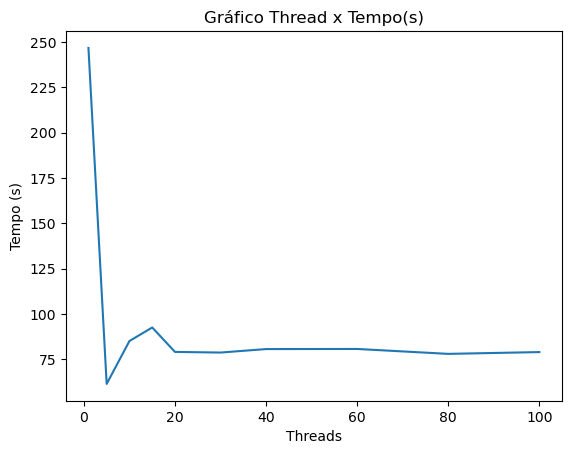

In [3]:
#Plotando agora esse resultado fica o seguinte:
import matplotlib.pyplot as plt

x1 = [1,5,10,15,20,30,40,60,80,100]
y1 = [246.79,61.39,85.06,92.53,79.05,78.7, 80.62,80.68,77.97,78.96]

plt.plot(x1, y1)

plt.xlabel('Threads')

plt.ylabel('Tempo (s)') 

plt.title('Gráfico Thread x Tempo(s)')

plt.show()

Podemos perceber que após 20 Threads utilizadas, o tempo fica mais estável. Além de que quando utilizamos apenas 1 Thread o tempo de processamento é muito grande, em relação ao número de Threads subsequentes.

# e) Link para a página descrevendo o coletor criado

 https://shelbybot1.wordpress.com